In [1]:
import numpy as np
import pandas as pd
from os.path import join
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout,BatchNormalization,Activation,Dropout,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.regularizers import l2
import glob
from IPython.display import Image, display
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

In [2]:
img_dir='./question_1_dataset/train/'

In [3]:
total_imgs=len(glob.glob(img_dir+'/*.png'))
total_imgs

4465

In [4]:
fnames=['{}.png'.format(i) for i in range(1,total_imgs+1)]
len(fnames)

4465

In [5]:
img_paths=[join(img_dir,filename) for filename in fnames]

In [6]:
imgs=[load_img(img_path,target_size=(100,100)) for img_path in img_paths]

In [7]:
len(imgs)

4465

In [8]:
img_array = np.array([img_to_array(img) for img in imgs])
img_array=img_array/255

In [9]:
img_array.shape

(4465, 100, 100, 3)

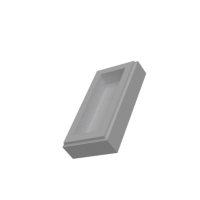

In [10]:
display(Image(img_paths[0]))

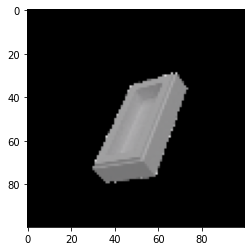

In [11]:
plt.imshow(img_array[0])

In [12]:
from tensorflow.keras.utils import to_categorical
x=img_array
df=pd.read_csv('./question_1_dataset/train.csv')
y_out=np.array(df['category'])
y=to_categorical(y_out)
y=y[:,1:]

x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.2,random_state=4)


In [13]:
from sklearn.metrics import f1_score
def score(model,x_cv,y_cv):
  yhat=model.predict(x_cv)
  yhat=yhat.argmax(axis=1)+1
  y_cv=y_cv.argmax(axis=1)+1
  f1s=f1_score(y_cv, yhat, average='weighted')
  return f1s 


In [14]:
def model_normal():
  model=Sequential()
  model.add(Conv2D(10,kernel_size=3,activation='relu',input_shape=(100,100,3)))
  model.add(MaxPool2D(pool_size=(2,2),strides=2))
  model.add(Conv2D(10,kernel_size=3,activation='relu'))
  #model.add(Conv2D(20,kernel_size=3,activation='relu'))
  model.add(Flatten())
  model.add(Dense(50,activation='relu'))
  model.add(Dense(16,activation='softmax'))
  return model


In [15]:
#without any regularization
model_normal_=model_normal()
model_normal_.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_normal_.fit(x_train,y_train,batch_size=50,epochs=20,validation_split=0.2)

Epoch 1/20
58/58 [==============================] - 10s 172ms/step - loss: 1.5743 - accuracy: 0.4830 - val_loss: 1.2416 - val_accuracy: 0.6140
Epoch 2/20
58/58 [==============================] - 9s 154ms/step - loss: 0.6859 - accuracy: 0.7767 - val_loss: 0.8600 - val_accuracy: 0.7147
Epoch 3/20
58/58 [==============================] - 8s 146ms/step - loss: 0.4315 - accuracy: 0.8533 - val_loss: 0.7696 - val_accuracy: 0.7748
Epoch 4/20
58/58 [==============================] - 9s 150ms/step - loss: 0.2790 - accuracy: 0.9065 - val_loss: 0.5447 - val_accuracy: 0.7986
Epoch 5/20
58/58 [==============================] - 10s 173ms/step - loss: 0.2013 - accuracy: 0.9258 - val_loss: 0.5251 - val_accuracy: 0.8084
Epoch 6/20
58/58 [==============================] - 10s 181ms/step - loss: 0.1476 - accuracy: 0.9503 - val_loss: 0.5749 - val_accuracy: 0.8084
Epoch 7/20
58/58 [==============================] - 11s 189ms/step - loss: 0.1181 - accuracy: 0.9636 - val_loss: 0.6587 - val_accuracy: 0.8084
Ep

In [16]:
score_normal=score(model_normal_,x_cv,y_cv)
score_normal

0.874587471264066

In [20]:
def model_bn():
  model=Sequential()
  model.add(Conv2D(10,kernel_size=3,activation=None,input_shape=(100,100,3)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPool2D(strides=2))
  model.add(Conv2D(10,kernel_size=3,activation=None))
  #model.add(Conv2D(20,kernel_size=3,activation='relu'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPool2D(strides=2))
  model.add(Flatten())
  model.add(Dense(50,activation='relu'))
  model.add(Dense(16,activation='softmax'))
  return model


In [21]:
model_bn_=model_bn()
model_bn_.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_bn_.fit(x_train,y_train,batch_size=50,epochs=20,validation_split=0.2)

Epoch 1/20
58/58 [==============================] - 25s 433ms/step - loss: 1.6567 - accuracy: 0.4764 - val_loss: 2.3375 - val_accuracy: 0.4895
Epoch 2/20
58/58 [==============================] - 24s 407ms/step - loss: 0.6312 - accuracy: 0.7966 - val_loss: 2.2098 - val_accuracy: 0.5315
Epoch 3/20
58/58 [==============================] - 23s 392ms/step - loss: 0.4063 - accuracy: 0.8638 - val_loss: 1.9227 - val_accuracy: 0.6336
Epoch 4/20
58/58 [==============================] - 23s 400ms/step - loss: 0.2671 - accuracy: 0.9118 - val_loss: 1.6028 - val_accuracy: 0.5455
Epoch 5/20
58/58 [==============================] - 28s 479ms/step - loss: 0.2203 - accuracy: 0.9342 - val_loss: 1.2406 - val_accuracy: 0.5748
Epoch 6/20
58/58 [==============================] - 24s 406ms/step - loss: 0.2283 - accuracy: 0.9237 - val_loss: 1.0316 - val_accuracy: 0.6434
Epoch 7/20
58/58 [==============================] - 23s 395ms/step - loss: 0.1327 - accuracy: 0.9576 - val_loss: 0.8284 - val_accuracy: 0.6937

In [22]:
score_bn=score(model_bn_, x_cv, y_cv)
score_bn

0.8631668285583136

In [23]:
def model_dropout():
  model=Sequential()
  model.add(Conv2D(10,kernel_size=3,activation='relu',input_shape=(100,100,3)))
  model.add(MaxPool2D(strides=2))
  model.add(Dropout(0.2))
  model.add(Conv2D(10,kernel_size=3,activation='relu'))
  model.add(MaxPool2D(strides=2))
  model.add(Dropout(0.2))
  #model.add(Conv2D(20,kernel_size=3,activation='relu'))
  model.add(Flatten())
  model.add(Dense(50,activation='relu'))
  model.add(Dense(16,activation='softmax'))
  return model


In [24]:
model_dropout_=model_dropout()
model_dropout_.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_dropout_.fit(x_train,y_train,batch_size=50,epochs=20,validation_split=0.2)

Epoch 1/20
58/58 [==============================] - 10s 164ms/step - loss: 1.7162 - accuracy: 0.4200 - val_loss: 1.1316 - val_accuracy: 0.5888
Epoch 2/20
58/58 [==============================] - 8s 145ms/step - loss: 0.8145 - accuracy: 0.7140 - val_loss: 0.7636 - val_accuracy: 0.7343
Epoch 3/20
58/58 [==============================] - 8s 138ms/step - loss: 0.5740 - accuracy: 0.7949 - val_loss: 0.6326 - val_accuracy: 0.7678
Epoch 4/20
58/58 [==============================] - 8s 140ms/step - loss: 0.4537 - accuracy: 0.8411 - val_loss: 0.5934 - val_accuracy: 0.7902
Epoch 5/20
58/58 [==============================] - 8s 146ms/step - loss: 0.3651 - accuracy: 0.8691 - val_loss: 0.4929 - val_accuracy: 0.8224
Epoch 6/20
58/58 [==============================] - 9s 153ms/step - loss: 0.3149 - accuracy: 0.8848 - val_loss: 0.5812 - val_accuracy: 0.8210
Epoch 7/20
58/58 [==============================] - 8s 146ms/step - loss: 0.2845 - accuracy: 0.9030 - val_loss: 0.5018 - val_accuracy: 0.8322
Epoch

In [25]:
score_dropout=score(model_dropout_,x_cv,y_cv)
score_dropout

0.8857644616998964

In [26]:
def model_regu():
  model=Sequential()
  model.add(Conv2D(10,kernel_size=3,activation='relu',input_shape=(100,100,3),kernel_regularizer=l2(0.1)))
  model.add(MaxPool2D(strides=2))
  #model.add(Dropout(0.2))
  model.add(Conv2D(10,kernel_size=3,activation='relu',kernel_regularizer=l2(0.1)))
  model.add(MaxPool2D(strides=2))
  #model.add(Dropout(0.2))
  #model.add(Conv2D(20,kernel_size=3,activation='relu'))
  model.add(Flatten())
  model.add(Dense(50,activation='relu'))
  model.add(Dense(16,activation='softmax'))
  return model


In [27]:
model_regu_=model_regu()
model_regu_.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_regu_.fit(x_train,y_train,batch_size=50,epochs=20,validation_split=0.2)

Epoch 1/20
58/58 [==============================] - 10s 168ms/step - loss: 2.7597 - accuracy: 0.4732 - val_loss: 1.8363 - val_accuracy: 0.6406
Epoch 2/20
58/58 [==============================] - 9s 163ms/step - loss: 1.3975 - accuracy: 0.7203 - val_loss: 1.2278 - val_accuracy: 0.7273
Epoch 3/20
58/58 [==============================] - 10s 169ms/step - loss: 0.9739 - accuracy: 0.7767 - val_loss: 0.9575 - val_accuracy: 0.7566
Epoch 4/20
58/58 [==============================] - 10s 168ms/step - loss: 0.7653 - accuracy: 0.8166 - val_loss: 0.8581 - val_accuracy: 0.7706
Epoch 5/20
58/58 [==============================] - 8s 143ms/step - loss: 0.6450 - accuracy: 0.8369 - val_loss: 0.8355 - val_accuracy: 0.7497
Epoch 6/20
58/58 [==============================] - 8s 143ms/step - loss: 0.5523 - accuracy: 0.8537 - val_loss: 0.7211 - val_accuracy: 0.8014
Epoch 7/20
58/58 [==============================] - 9s 157ms/step - loss: 0.4972 - accuracy: 0.8729 - val_loss: 0.6812 - val_accuracy: 0.8042
Epo

In [28]:
score_regu=score(model_regu_,x_cv,y_cv)
score_regu

0.8779977373143908

In [38]:
def model_final():
  model=Sequential()
  model.add(Conv2D(10,kernel_size=3,activation='relu',input_shape=(100,100,3)))
  #model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPool2D(strides=2))
  model.add(Dropout(0.2))
  model.add(Conv2D(10,kernel_size=3,activation=None))
  #model.add(Conv2D(20,kernel_size=3,activation='relu'))
  #model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPool2D(strides=2))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(50,activation='relu'))
  model.add(Dense(16,activation='softmax'))
  return model


In [39]:
#with augmentation and dropouts
model_final_=model_final()
model_final_.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_final_.fit(train_generator,steps_per_epoch=70,epochs=30,validation_data=(x_cv,y_cv))


Epoch 1/30
70/70 [==============================] - 15s 220ms/step - loss: 1.5714 - accuracy: 0.4634 - val_loss: 0.8909 - val_accuracy: 0.7055
Epoch 2/30
70/70 [==============================] - 15s 221ms/step - loss: 0.7712 - accuracy: 0.7120 - val_loss: 0.6955 - val_accuracy: 0.7727
Epoch 3/30
70/70 [==============================] - 16s 233ms/step - loss: 0.5984 - accuracy: 0.7745 - val_loss: 0.6038 - val_accuracy: 0.7973
Epoch 4/30
70/70 [==============================] - 16s 233ms/step - loss: 0.4903 - accuracy: 0.8174 - val_loss: 0.5863 - val_accuracy: 0.7984
Epoch 5/30
70/70 [==============================] - 22s 312ms/step - loss: 0.4429 - accuracy: 0.8309 - val_loss: 0.4876 - val_accuracy: 0.8186
Epoch 6/30
70/70 [==============================] - 20s 279ms/step - loss: 0.3748 - accuracy: 0.8505 - val_loss: 0.4630 - val_accuracy: 0.8231
Epoch 7/30
70/70 [==============================] - 128s 2s/step - loss: 0.3581 - accuracy: 0.8589 - val_loss: 0.5123 - val_accuracy: 0.8163
E

In [40]:
score_final=score(model_final_,x_cv,y_cv)
score_final

0.9115595765650053

In [18]:
#fitting with image data augmentation
data_generator_with_aug = ImageDataGenerator( horizontal_flip = True, validation_split=0.2)
model_for_aug=model_normal()
train_generator = data_generator_with_aug.flow(
        x_train,y_train,batch_size=50
        )
model_for_aug.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_for_aug.fit_generator(
        train_generator,
        epochs = 20,
        steps_per_epoch=70,validation_data=(x_cv,y_cv))


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
70/70 [==============================] - 12s 176ms/step - loss: 1.3088 - accuracy: 0.5611 - val_loss: 0.5972 - val_accuracy: 0.7984
Epoch 2/20
70/70 [==============================] - 11s 161ms/step - loss: 0.4768 - accuracy: 0.8321 - val_loss: 0.4515 - val_accuracy: 0.8376
Epoch 3/20
70/70 [==============================] - 11s 162ms/step - loss: 0.3467 - accuracy: 0.8736 - val_loss: 0.3769 - val_accuracy: 0.8589
Epoch 4/20
70/70 [==============================] - 11s 158ms/step - loss: 0.2732 - accuracy: 0.8975 - val_loss: 0.3370 - val_accuracy: 0.8667
Epoch 5/20
70/70 [==============================] - 11s 160ms/step - loss: 0.2107 - accuracy: 0.9211 - val_loss: 0.2693 - val_accuracy: 0.8936
Epoch 6/20
70/70 [==============================] - 11s 158ms/step - loss: 0.1798 - accuracy: 0.9283 - val_loss: 0.2755 - val_accuracy: 0.8981
Epoch 7/20
70/70 [==============================] - 11s 158ms/step

In [41]:
score_augmented=score(model_for_aug,x_cv,y_cv)
score_augmented

0.9380542657659966

In [42]:

img_dir_test='./question_1_dataset/test/'
total_imgs_test=len(glob.glob(img_dir_test+'/*.png'))
fnames_test=['{}.png'.format(i) for i in range(total_imgs+1,total_imgs+total_imgs_test+1)]
img_paths_test=[join(img_dir_test,filename) for filename in fnames_test]
imgs_test=[load_img(img_path_test,target_size=(100,100)) for img_path_test in img_paths_test]
img_array_test = np.array([img_to_array(img) for img in imgs_test])
img_array_test=img_array_test/255



In [46]:
x_test=img_array_test
yhat=model_for_aug.predict(x)
yhat_test=model_for_aug.predict(x_test)
yhat_test=yhat_test.argmax(axis=1)+1
yhat=yhat.argmax(axis=1)+1

In [47]:
y_final=np.hstack([yhat,yhat_test])
y_final.shape

(6379,)

In [48]:
import csv

In [49]:
with open("./question_1_dataset/Testfinal.csv","w") as file:
    writer=csv.writer(file)
    for i in range(total_imgs):
        writer.writerow([fnames[i],yhat[i]])
    for i in range(total_imgs_test):
        writer.writerow([fnames_test[i],yhat_test[i]])


In [50]:
df=pd.read_csv('./question_1_dataset/Testfinal.csv')

In [51]:
df

,1.png,9
0,2.png,3
1,3.png,9
2,4.png,8
3,5.png,13
4,6.png,7
...,...,...
6373,6375.png,8
6374,6376.png,13
6375,6377.png,7
6376,6378.png,3
